# Проект: вариант 3

In [1]:
import pandas as pd
import pingouin as pg
from scipy.stats import kruskal, chi2_contingency
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

## Данные
Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:

### users_*.csv – информация о пользователях:

- uid – идентификатор пользователя
- age – возраст
- attraction_coeff – коэффициент привлекательности (от 0 до 1000, $\frac{лайки}{просмотры}$*1000)
- coins – число монеток (внутренняя валюта)
- country – страна  
- visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
- gender – пол
- age_filter_start  – фильтр поиска, мин. значение 
- age_filter_end  – фильтр поиска, макс. значение 
- views_count – число полученных оценок 
- was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
- is_premium –  является ли премиум
- total_revenue – нормированная выручка 

#### users_test – информация о пользователях в тестовой группе. 

In [2]:
users_test = pd.read_csv('Проект_3_users_test.csv', sep=';')
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


#### users_control_1 – информация о пользователях в первой контрольной группе.

In [3]:
users_control_1 = pd.read_csv('Проект_3_users_control_1.csv', sep=';')
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


#### users_control_2 – информация о пользователях во второй контрольной группе . 

In [4]:
users_control_2 = pd.read_csv('Проект_3_users_control_2.csv', sep=';')
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


### transactions_*.csv – информация о платежах пользователей:

- uid – идентификатор пользователя
- country – страна
- joined_at – дата и время регистрации
- paid_at – дата и время покупки
- revenue – нормированная выручка
- payment_id – идентификатор платежа
- from_page – откуда пользователь перешел на страницу оплаты
- product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое) 

#### transactions_test – информация о платежах пользователей в тестовой группе. 

In [5]:
transactions_test = pd.read_csv('Проект_3_transactions_test.csv', sep=';')
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [6]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [7]:
transactions_test.joined_at = pd.to_datetime(transactions_test.joined_at)
transactions_test.paid_at = pd.to_datetime(transactions_test.paid_at)

In [8]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           273 non-null    int64         
 1   country       273 non-null    object        
 2   joined_at     273 non-null    datetime64[ns]
 3   paid_at       273 non-null    datetime64[ns]
 4   revenue       273 non-null    int64         
 5   payment_id    273 non-null    int64         
 6   from_page     273 non-null    object        
 7   product_type  273 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.2+ KB


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


#### transactions_control_1 – информация о платежах пользователей в первой контрольной группе. 

In [9]:
transactions_control_1 = pd.read_csv('Проект_3_transactions_control_1.csv', sep=';')
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [10]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [11]:
transactions_control_1.joined_at = pd.to_datetime(transactions_control_1.joined_at)
transactions_control_1.paid_at = pd.to_datetime(transactions_control_1.paid_at)

In [12]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 63.1+ KB


#### transactions_control_2 – информация о платежах пользователей во второй контрольной группе 

In [13]:
transactions_control_2 = pd.read_csv('Проект_3_transactions_control_2.csv', sep=';')
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [14]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           328 non-null    int64 
 1   country       328 non-null    object
 2   joined_at     328 non-null    object
 3   paid_at       328 non-null    object
 4   revenue       328 non-null    int64 
 5   payment_id    328 non-null    int64 
 6   from_page     328 non-null    object
 7   product_type  328 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.6+ KB


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [15]:
transactions_control_2.joined_at = pd.to_datetime(transactions_control_2.joined_at)
transactions_control_2.paid_at = pd.to_datetime(transactions_control_2.paid_at)

In [16]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           328 non-null    int64         
 1   country       328 non-null    object        
 2   joined_at     328 non-null    datetime64[ns]
 3   paid_at       328 non-null    datetime64[ns]
 4   revenue       328 non-null    int64         
 5   payment_id    328 non-null    int64         
 6   from_page     328 non-null    object        
 7   product_type  328 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.6+ KB


# Проект: вариант 3
Представьте, что вы работаете в крупном дейтинговом приложении (сервис для знакомств).

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:

Был ли эксперимент успешен в целом.
*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

__Для начала проверим данные на полные дубликаты__

In [17]:
print(f'В информации о пользователях в тестовой группе {users_test.duplicated().sum()} дубликатов')
print(f'В информации о пользователях в первой контрольной группе {users_control_1.duplicated().sum()} дубликатов')
print(f'В информации о пользователях во второй контрольной группе {users_control_2.duplicated().sum()} дубликатов')

В информации о пользователях в тестовой группе 0 дубликатов
В информации о пользователях в первой контрольной группе 0 дубликатов
В информации о пользователях во второй контрольной группе 0 дубликатов


In [18]:
print(f'В информации о платежах пользователей тестовой группы {transactions_test.duplicated().sum()} дубликатов')
print(f'В информации о платежах пользователей контрольной группы_1 {transactions_control_1.duplicated().sum()} дубликатов')
print(f'В информации о платежах пользователей контрольной группы_2 {transactions_control_2.duplicated().sum()} дубликатов')

В информации о платежах пользователей тестовой группы 7 дубликатов
В информации о платежах пользователей контрольной группы_1 650 дубликатов
В информации о платежах пользователей контрольной группы_2 5 дубликатов


Удаляем дубликаты

In [19]:
transactions_test = transactions_test.drop_duplicates()
transactions_control_1 = transactions_control_1.drop_duplicates()
transactions_control_2 = transactions_control_2.drop_duplicates()

__Проверим данные на совпадение, есть ли все пользователи из датафрейма информация о платежах пользователей в датафрейме информация о пользователях__

In [20]:
def coincidences():
    print((transactions_test['uid'].isin(users_test['uid'])).value_counts())
    print(f"{len(transactions_test)} \n")

    print((transactions_control_1['uid'].isin(users_control_1['uid'])).value_counts())
    print(f"{len(transactions_control_1)} \n")

    print((transactions_control_2['uid'].isin(users_control_2['uid'])).value_counts())
    print(f"{len(transactions_control_2)}")
coincidences()

True    266
Name: uid, dtype: int64
266 

True     356
False      1
Name: uid, dtype: int64
357 

True    323
Name: uid, dtype: int64
323


#### В первой контрольной группе есть разрыв

В транзакциях контрольной группы 1 есть идентификаторы пользователей, которых нет в датафрейме информация о пользователях. Для обеспечения корректности анализа такие транзакции удаленяем (оставлены будут только те, чьи идентификаторы есть в обоих датафреймах).

In [21]:
transactions_control_1 = transactions_control_1[transactions_control_1['uid'].isin(users_control_1['uid'])]

__Проверка пересечения пользователей между группами__

Для обеспечения валидности A/B теста важно, чтобы один и тот же пользователь не попадал сразу в несколько экспериментальных групп

Ранее были проверены полные дубликаты строк, однако это не исключает ситуации, когда один и тот же пользователь присутствует в нескольких выборках, но с разными значениями других полей

In [22]:
len(set(users_test['uid']) & set(users_control_1['uid']))

0

In [23]:
len(set(users_test['uid']) & set(users_control_2['uid']))

0

In [24]:
len(set(users_control_1['uid']) & set(users_control_2['uid']))

0

Проверка пересечения пользователей между группами показала, что таких пересечений нет

Это подтверждает, что разбиение на группы корректное:

__Все пользователи уникальны в пределах своей группы__

Теперь хотелось бы проверить эквивалентность групп по составу, начнем с __возраста__

(array([1057., 1490.,  859.,  580.,  220.,   44.,    7.,    2.,    2.,
           3.]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <a list of 10 Patch objects>)

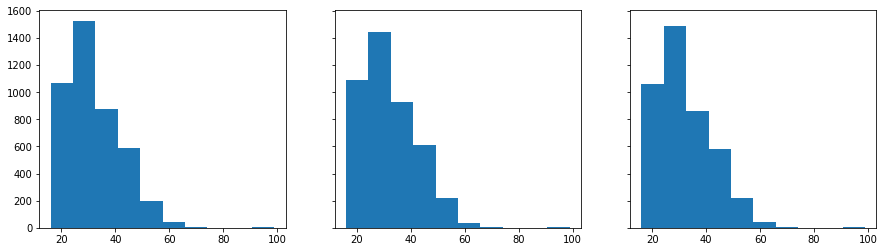

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axes[0].hist(users_test['age'])
axes[1].hist(users_control_1['age'])
axes[2].hist(users_control_2['age'])

In [26]:
print(f"{pg.normality(users_test['age'])} \n")

print(f"{pg.normality(users_control_1['age'])} \n")

print(f"{pg.normality(users_control_2['age'])} \n")

            W          pval  normal
age  0.929385  4.292598e-41   False 

           W          pval  normal
age  0.93345  2.593902e-40   False 

            W          pval  normal
age  0.941304  3.639820e-38   False 



Так как распределения не нормальны используем тест Крускала–Уоллиса

In [27]:
kruskal(users_test['age'],
        users_control_1['age'],
        users_control_2['age'])

KruskalResult(statistic=1.1101328014539542, pvalue=0.5740341436464856)

H<sub>0</sub>: Распределения возраста пользователей в группах одинаковы.  
H<sub>1</sub>: Распределения возраста хотя бы в одной из групп отличаются.

Распределение возраста среди пользователей в тестовой и контрольных группах не имеет статистически значимых отличий p-value = 0.57 по тесту Крускала–Уоллиса

Так как p-value > 0.05 H<sub>0</sub> не отвергаем

Это позволяет считать группы сопоставимыми по возрасту и продолжить анализ результатов A/B теста без корректировок по этому признаку

далее проверим __коэффициент привлекательности__

(array([147., 337., 330., 407., 395., 210., 259., 209., 110., 341.]),
 array([   1. ,  100.9,  200.8,  300.7,  400.6,  500.5,  600.4,  700.3,
         800.2,  900.1, 1000. ]),
 <a list of 10 Patch objects>)

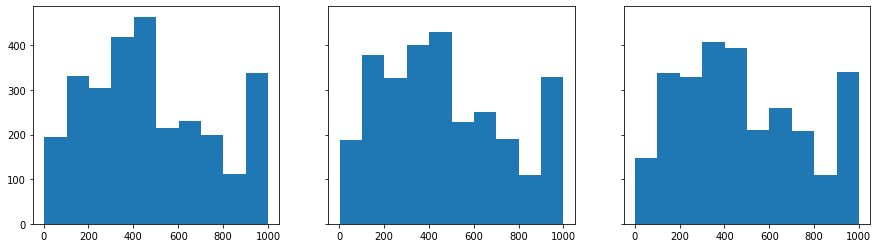

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axes[0].hist(users_test[users_test['attraction_coeff']>0]['attraction_coeff'])
axes[1].hist(users_control_1[users_control_1['attraction_coeff']>0]['attraction_coeff'])
axes[2].hist(users_control_2[users_control_2['attraction_coeff']>0]['attraction_coeff'])

In [29]:
print(f"{pg.normality(users_test[users_test['attraction_coeff']>0]['attraction_coeff'])} \n")

print(f"{pg.normality(users_control_1[users_control_1['attraction_coeff']>0]['attraction_coeff'])} \n")

print(f"{pg.normality(users_control_2[users_control_2['attraction_coeff']>0]['attraction_coeff'])} \n")

                         W          pval  normal
attraction_coeff  0.948195  2.180167e-30   False 

                         W          pval  normal
attraction_coeff  0.947356  1.096003e-30   False 

                         W          pval  normal
attraction_coeff  0.946274  1.527793e-30   False 



Так как распределения не нормальны используем тест Крускала–Уоллиса

In [30]:
kruskal(users_test[users_test['attraction_coeff']>0]['attraction_coeff'],
        users_control_1[users_control_1['attraction_coeff']>0]['attraction_coeff'],
        users_control_2[users_control_2['attraction_coeff']>0]['attraction_coeff'])

KruskalResult(statistic=3.8617894454375916, pvalue=0.14501838917317744)

H<sub>0</sub>: Распределения коэффициента привлекательности в группах одинаковы.  
H<sub>1</sub>: Распределения коэффициента привлекательности хотя бы в одной из групп отличаются.

Распределение коэффициента привлекательности среди пользователей в тестовой и контрольных группах не имеет статистически значимых отличий p-value = 0.14 по тесту Крускала–Уоллиса 

Так как p-value > 0.05, H<sub>0</sub> не отвергается.

Это позволяет считать группы сопоставимыми по коэффициенту привлекательности и продолжить анализ результатов A/B теста без корректировок по этому признаку

далее проверим __страны__

In [31]:
users_test['group'] = 'test'
users_control_1['group'] = 'control_1'
users_control_2['group'] = 'control_2'

all_country = pd.concat([users_test[['country', 'group']], users_control_1[['country', 'group']], users_control_2[['country', 'group']]], ignore_index=True)
all_country

users_test = users_test.drop('group', axis=1)
users_control_1 = users_control_1.drop('group', axis=1)
users_control_2 = users_control_2.drop('group', axis=1)

In [32]:
all_country = pd.crosstab(all_country['country'], all_country['group'])
all_country

group,control_1,control_2,test
country,,,
Algeria,2,0,2
Argentina,389,397,396
Armenia,1,0,0
Australia,50,51,62
Austria,0,2,0
...,...,...,...
United Kingdom (Great Britain),146,146,169
United States of America,1471,1486,1450
Uruguay,0,1,1


In [33]:
chi2 = chi2_contingency(all_country)
print(f"p-value: {chi2[1]}")

p-value: 0.658154701146375


H<sub>0</sub>: Распределения стран между группами одинаковы.  
H<sub>1</sub>: Распределения стран хотя бы в одной из групп отличаются.

Распределение стран среди пользователей в тестовой и контрольных группах не имеет статистически значимых отличий p-value = 0.66 по критерию хи-квадрат

Так как p-value > 0.05, H<sub>0</sub> не отвергается

Это позволяет считать группы сопоставимыми по странам и продолжить анализ результатов A/B теста без корректировок по этому признаку

И под конец __количество визитов__

In [34]:
users_test['visit_count'] = users_test['visit_days'].apply(
    lambda x: len(str(x).split(",")) if pd.notnull(x) else 0)

users_control_1['visit_count'] = users_control_1['visit_days'].apply(
    lambda x: len(str(x).split(",")) if pd.notnull(x) else 0)

users_control_2['visit_count'] = users_control_2['visit_days'].apply(
    lambda x: len(str(x).split(",")) if pd.notnull(x) else 0)

(array([2686.,  528.,  349.,  216.,  154.,  123.,   68.,   69.,   38.,
          33.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

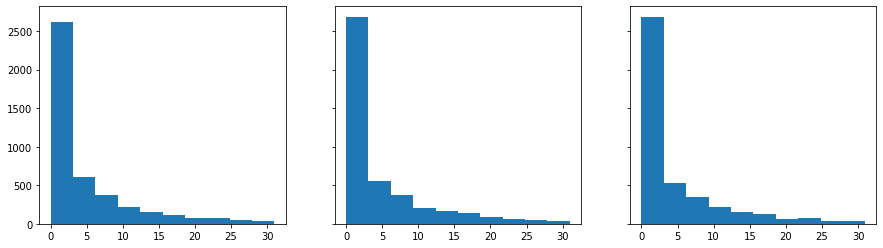

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axes[0].hist(users_test['visit_count'])
axes[1].hist(users_control_1['visit_count'])
axes[2].hist(users_control_2['visit_count'])

In [36]:
print(f"{pg.normality(users_test['visit_count'])} \n")

print(f"{pg.normality(users_control_1['visit_count'])} \n")

print(f"{pg.normality(users_control_2['visit_count'])} \n")

                   W  pval  normal
visit_count  0.75079   0.0   False 

                    W  pval  normal
visit_count  0.747675   0.0   False 

                    W  pval  normal
visit_count  0.739058   0.0   False 



Так как распределения не нормальны используем тест Крускала–Уоллиса

In [37]:
kruskal(users_test['visit_count'],
        users_control_1['visit_count'],
        users_control_2['visit_count'])

KruskalResult(statistic=3.918718944478727, pvalue=0.1409486735515363)

H<sub>0</sub>: Распределения числа дней посещений visit_count между группами одинаковы.  
H<sub>1</sub>: Распределения числа дней посещений хотя бы в одной из групп отличаются.

Распределение visit_count среди пользователей в тестовой и контрольных группах не имеет статистически значимых отличий p-value = 0.14 по тесту Крускала–Уоллиса

Так как p-value > 0.05, H<sub>0</sub> не отвергается

Это позволяет считать группы сопоставимыми по visit_count и продолжить анализ результатов A/B теста без корректировок по этому признаку

#### Далее посмотрим на временные различия между группами

(array([  3.,   8.,   8.,   3.,  16.,  12.,   8.,   6.,   6., 253.]),
 array([736340.35833333, 736369.69631944, 736399.03430556, 736428.37229167,
        736457.71027778, 736487.04826389, 736516.38625   , 736545.72423611,
        736575.06222222, 736604.40020833, 736633.73819444]),
 <a list of 10 Patch objects>)

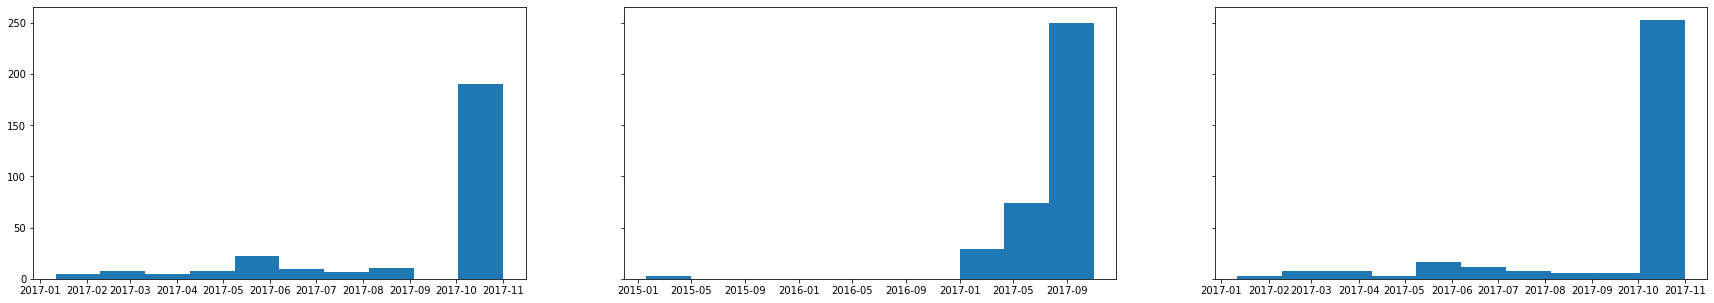

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
axes[0].hist(transactions_test['joined_at'])
axes[1].hist(transactions_control_1['joined_at'])
axes[2].hist(transactions_control_2['joined_at'])

По графикам видно что в тестовой и второй контрольных группах окно регистрации ограничивается 2017 годом

Отфильтруем данные в первой контрольной группе так как для корректного A/B теста требуются сопоставимые временные срезы. Пользователи, зарегистрированные в 2015–2016 годах, не соответствуют условиям теста (он проводился только на новых пользователях). Поэтому они были исключены из анализа.

In [39]:
transactions_control_1 = transactions_control_1[transactions_control_1['joined_at'] >= '2016-12-01']

(array([  3.,   8.,   8.,   3.,  16.,  12.,   8.,   6.,   6., 253.]),
 array([736340.35833333, 736369.69631944, 736399.03430556, 736428.37229167,
        736457.71027778, 736487.04826389, 736516.38625   , 736545.72423611,
        736575.06222222, 736604.40020833, 736633.73819444]),
 <a list of 10 Patch objects>)

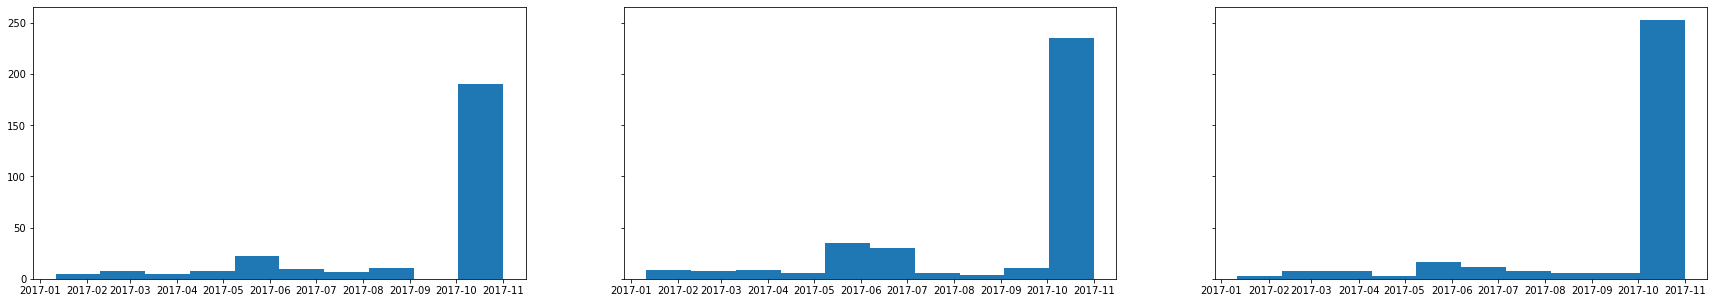

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
axes[0].hist(transactions_test['joined_at'])
axes[1].hist(transactions_control_1['joined_at'])
axes[2].hist(transactions_control_2['joined_at'])

(array([ 16.,  13.,  13.,  15.,  18.,  10.,  14.,  11., 178.,  35.]),
 array([736340.23194444, 736373.70652778, 736407.18111111, 736440.65569444,
        736474.13027778, 736507.60486111, 736541.07944444, 736574.55402778,
        736608.02861111, 736641.50319444, 736674.97777778]),
 <a list of 10 Patch objects>)

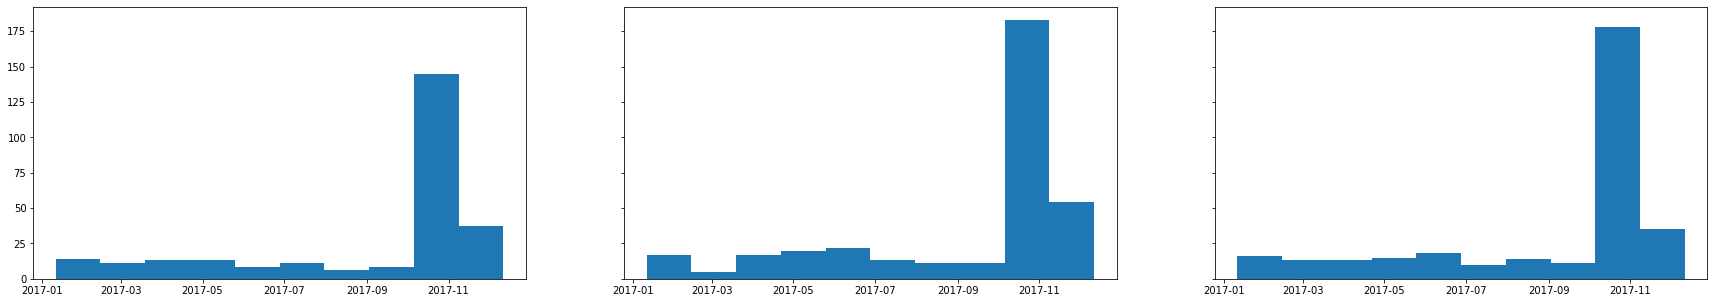

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5), sharey=True)
axes[0].hist(transactions_test['paid_at'])
axes[1].hist(transactions_control_1['paid_at'])
axes[2].hist(transactions_control_2['paid_at'])

После фильтрации старых пользователей визуально временные распределения между группами стали ближе

Во всех группах активность пользователей была в 2017 году 

Сравним задержки между регистрациями и покупками

In [42]:
transactions_test['lag_days'] = (transactions_test['paid_at'] - transactions_test['joined_at']).dt.days
transactions_control_1['lag_days'] = (transactions_control_1['paid_at'] - transactions_control_1['joined_at']).dt.days
transactions_control_2['lag_days'] = (transactions_control_2['paid_at'] - transactions_control_2['joined_at']).dt.days

Фильтр от отрицательной задержки (связанной скорее всего либо с отсутствующей записью о регистрации, либо с багом из-за которого регистрация позже покупки)

In [43]:
def filt_trans(transactions):
    return transactions[
    (transactions['joined_at'].notnull()) &
    (transactions['paid_at'] >= transactions['joined_at'])]['lag_days']

(array([202.,  23.,  12.,   0.,   6.,   5.,   0.,   3.,   4.,   8.]),
 array([  0. ,  21.4,  42.8,  64.2,  85.6, 107. , 128.4, 149.8, 171.2,
        192.6, 214. ]),
 <a list of 10 Patch objects>)

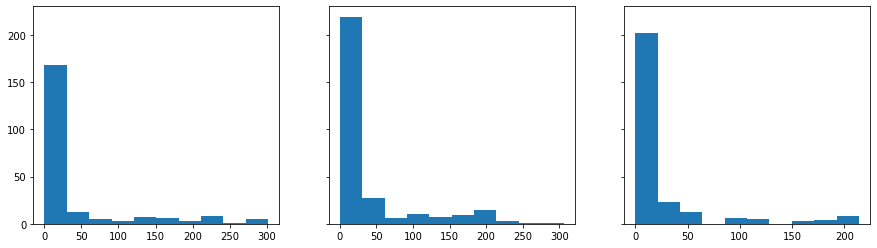

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axes[0].hist(filt_trans(transactions_test))
axes[1].hist(filt_trans(transactions_control_1))
axes[2].hist(filt_trans(transactions_control_2))

In [45]:
print(f"{pg.normality(filt_trans(transactions_test))} \n")

print(f"{pg.normality(filt_trans(transactions_control_1))} \n")

print(f"{pg.normality(filt_trans(transactions_control_2))} \n")

                 W          pval  normal
lag_days  0.586354  1.345910e-22   False 

                 W          pval  normal
lag_days  0.632923  8.437418e-25   False 

                 W          pval  normal
lag_days  0.521819  3.761833e-26   False 



Так как распределения не нормальны используем тест Крускала–Уоллиса

In [46]:
kruskal(filt_trans(transactions_test),
        filt_trans(transactions_control_1),
        filt_trans(transactions_control_2))

KruskalResult(statistic=5.802288173858514, pvalue=0.05496030470671236)

H<sub>0</sub>: Распределения lag_days (времени между регистрацией и оплатой) в группах одинаковы.  
H<sub>1</sub>: Распределения lag_days хотя бы в одной из групп отличаются

Распределение lag_days среди пользователей в тестовой и контрольных группах не имеет статистически значимых отличий p-value = 0.055 по тесту Крускала–Уоллиса

Так как p-value > 0.05, H<sub>0</sub> не отвергается

Так как p-value очень близко к порогу 0.05 было принято решение проверить группы попарно

In [47]:
kruskal(filt_trans(transactions_test),
        filt_trans(transactions_control_1))

KruskalResult(statistic=0.38188832703318454, pvalue=0.5365943643357951)

H<sub>0</sub>: Распределения lag_days (времени между регистрацией и оплатой) в группах одинаковы.  
H<sub>1</sub>: Распределения lag_days хотя бы в одной из групп отличаются

Различия между test и control_1 по lag_days статистически незначимы p-value = 0.54 по тесту Крускала–Уоллиса

Так как p-value > 0.05, H<sub>0</sub> не отвергается

In [48]:
kruskal(filt_trans(transactions_test),
        filt_trans(transactions_control_2))

KruskalResult(statistic=2.5803801758103972, pvalue=0.10819567318243986)

H<sub>0</sub>: Распределения lag_days (времени между регистрацией и оплатой) в группах одинаковы.  
H<sub>1</sub>: Распределения lag_days хотя бы в одной из групп отличаются

Различия между test и control_2 по lag_days статистически незначимы p-value = 0.11 по тесту Крускала–Уоллиса

Так как p-value > 0.05, H<sub>0</sub> не отвергается

In [49]:
kruskal(filt_trans(transactions_control_1),
        filt_trans(transactions_control_2))

KruskalResult(statistic=5.496946351978433, pvalue=0.019049711280893913)

H<sub>0</sub>: Распределения lag_days (времени между регистрацией и оплатой) в группах одинаковы.  
H<sub>1</sub>: Распределения lag_days хотя бы в одной из групп отличаются

Различия между control_1 и control_2 по lag_days статистически значимы p-value = 0.02 по тесту Крускала–Уоллиса

Так как p-value < 0.05, H<sub>0</sub> отвергается

Следовательно контрольные группы не следует обьединять

#### Группы в A/B тесте эквивалентны по ключевым признакам (age, attraction_coeff, country, visit_count). Однако при проверке времени между регистрацией и покупкой (lag_days) были выявлены статистически значимые различия между группами, что исключает возможность объединения контрольных групп при дальнейшем анализе. В связи с этим сравнение результатов эксперимента следует проводить отдельно для каждой из контрольных групп

### В задании указано, что изменение цены затронуло пользователей из нескольких стран и при покупке через две новые платёжные системы. Однако в данных отсутствует информация о том, в каких именно странах это изменение происходило, и в данных отсутствует информация о самих платёжных системах или способах оплаты. Также не уточняется, в какую сторону изменилась цена. По этому анализ проводился на всех пользователях, без дополнительной фильтрации по этим признакам.

Объединим таблицы для более удобной дальнейшей работы

In [50]:
test_group = pd.merge(users_test, transactions_test, on=['uid'], suffixes=('_user', '_transaction'))
test_group.head()

,uid,age,attraction_coeff,coins,country_user,visit_days,gender,age_filter_start,age_filter_end,views_count,...,total_revenue,visit_count,country_transaction,joined_at,paid_at,revenue,payment_id,from_page,product_type,lag_days
0,891152790,29,769,NaN,Spain,"2,5,6",1,16,32,13,...,12597,3,Spain,2017-08-11 18:39:00,2017-10-11 11:29:00,12597,147,dating,premium_no_trial,60
1,892333656,50,436,4.0,United States of America,"1,2,3,4",1,47,53,126,...,897,4,United States of America,2017-10-16 01:45:00,2017-10-16 01:49:00,897,146,empty_likes,coins,0
2,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,37817,9,Italy,2017-10-31 14:16:00,2017-09-11 15:44:00,6305,19,empty_likes,coins,-50
3,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,37817,9,Italy,2017-10-31 14:16:00,2017-04-11 06:46:00,6305,19,autorefill,coins,-204
4,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,37817,9,Italy,2017-10-31 14:16:00,2017-10-31 16:07:00,12597,147,popular_users_chat,premium_no_trial,0


In [51]:
control_1_group = pd.merge(users_control_1, transactions_control_1, on=['uid'], suffixes=('_user', '_transaction'))
control_1_group.head()

,uid,age,attraction_coeff,coins,country_user,visit_days,gender,age_filter_start,age_filter_end,views_count,...,total_revenue,visit_count,country_transaction,joined_at,paid_at,revenue,payment_id,from_page,product_type,lag_days
0,891497961,28,400,28.0,Chile,"1,2",1,25,31,25,...,6396,2,Chile,2017-02-11 15:07:00,2017-02-11 17:16:00,2418.0,67.0,gifts,other_type,0
1,891497961,28,400,28.0,Chile,"1,2",1,25,31,25,...,6396,2,Chile,2017-02-11 15:07:00,2017-04-11 02:25:00,3978.0,146.0,empty_likes,coins,58
2,892380033,29,535,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,31,142,...,4732,31,United States of America,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial,0
3,891292845,22,0,NaN,Italy,NaN,1,19,40,0,...,1898,0,Italy,2017-06-11 03:51:00,2017-06-11 03:59:00,1898.0,68.0,none,premium_no_trial,0
4,892336797,24,255,NaN,United States of America,"1,6,7,9,10,11,13,14",1,21,27,43,...,6292,8,United States of America,2017-10-16 00:21:00,2017-10-16 00:51:00,6292.0,147.0,send_message,premium_no_trial,0


In [52]:
control_2_group = pd.merge(users_control_2, transactions_control_2, on=['uid'], suffixes=('_user', '_transaction'))
control_2_group.head()

,uid,age,attraction_coeff,coins,country_user,visit_days,gender,age_filter_start,age_filter_end,views_count,...,total_revenue,visit_count,country_transaction,joined_at,paid_at,revenue,payment_id,from_page,product_type,lag_days
0,892197879,28,71,NaN,Italy,1,1,25,31,14,...,2522,1,Italy,2017-10-18 22:22:00,2017-10-18 22:39:00,1261,19,gifts,coins,0
1,892197879,28,71,NaN,Italy,1,1,25,31,14,...,2522,1,Italy,2017-10-18 22:22:00,2017-10-19 01:57:00,1261,19,autorefill,coins,0
2,892164795,16,0,NaN,France,NaN,1,16,20,0,...,16562,0,France,2017-10-19 18:44:00,2017-10-26 20:48:00,16562,147,trial_vip_popup,trial_premium,7
3,892343331,30,1000,NaN,France,1,1,27,99,1,...,2873,1,France,2017-10-15 22:08:00,2017-10-15 23:24:00,2873,68,none,premium_no_trial,0
4,891668253,35,189,14.0,Chile,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17",1,24,38,190,...,20085,17,Chile,2017-10-29 23:08:00,2017-10-11 14:16:00,6305,19,empty_likes,coins,-19


#### Посчитаем конверсию

In [53]:
conversion_test = test_group.query('product_type == "premium_no_trial"')['uid'].nunique()/test_group['uid'].nunique()
round(conversion_test, 2)

0.46

In [54]:
conversion_control_1 = control_1_group.query('product_type == "premium_no_trial"')['uid'].nunique()/control_1_group['uid'].nunique()
round(conversion_control_1, 2)

0.52

In [55]:
conversion_control_2 = control_2_group.query('product_type == "premium_no_trial"')['uid'].nunique()/control_2_group['uid'].nunique()
round(conversion_control_2, 2)

0.55

Конверсия в премиум-подписку в тестовой группе составила 46%, тогда как в контрольных группах — 52% и 55%.
Похоже на то что после изменения цен пользователи стали реже оформлять подписку, но для того чтобы сделать обоснованные выводы, необходимо проверить статистическую значимость этой разницы

In [56]:
paying_test = test_group.query('product_type == "premium_no_trial"')['uid'].nunique()
paying_control_1 = control_1_group.query('product_type == "premium_no_trial"')['uid'].nunique()
paying_control_2 = control_2_group.query('product_type == "premium_no_trial"')['uid'].nunique()

total_test = test_group['uid'].nunique()
total_control_1 = control_1_group['uid'].nunique()
total_control_2 = control_2_group['uid'].nunique()

In [57]:
proportions_ztest([paying_test, paying_control_1], [total_test, total_control_1])

(-1.0332613028796895, 0.30148163139017925)

H<sub>0</sub>: Доля пользователей, купивших premium_no_trial, в группах одинакова.  
H<sub>1</sub>: Доли пользователей, купивших premium_no_trial, в группах различаются.

Для проверки использован z-тест для пропорций, использующийся при сравнении долей между независимыми выборками 
По результатам теста между тестовой группой и контрольной группой 1 различий не выявлено p-value = 0.3

Так как p-value > 0.05, H<sub>0</sub> не отвергается.

Это означает, что изменение цены не повлияло на долю пользователей, оформивших подписку.

In [58]:
proportions_ztest([paying_test, paying_control_2], [total_test, total_control_2])

(-1.5675569608453586, 0.11698456308002696)

H<sub>0</sub>: Доля пользователей, купивших premium_no_trial, в группах одинакова.  
H<sub>1</sub>: Доли пользователей, купивших premium_no_trial, в группах различаются.

Для проверки использован z-тест для пропорций, использующийся при сравнении долей между независимыми выборками 
По результатам теста между тестовой группой и контрольной группой 2 различий не выявлено p-value = 0.117

Так как p-value > 0.05, H<sub>0</sub> не отвергается.

Это означает, что изменение цены не повлияло на долю пользователей, оформивших подписку.

Несмотря на то, что конверсии визуально отличаются, статистически они не различаются, стоит посмотреть __ARPU__

In [59]:
arpu_test = test_group.query('product_type == "premium_no_trial"')['revenue'].sum() / users_test['uid'].nunique()
arpu_test

188.186165273909

In [60]:
arpu_control_1 = control_1_group.query('product_type == "premium_no_trial"')['revenue'].sum() / users_control_1['uid'].nunique()
arpu_control_1

179.5527649769585

In [61]:
arpu_control_2 = control_2_group.query('product_type == "premium_no_trial"')['revenue'].sum() / users_control_2['uid'].nunique()
arpu_control_2

174.6737804878049

ARPU в тестовой группе больше чем в контрольных группах

Сравним распределения

In [62]:
arpu_test = test_group.query('product_type == "premium_no_trial"').groupby('uid')['revenue'].sum()
arpu_test = pd.merge(users_test[['uid']], arpu_test, on='uid', how='left')
arpu_test['revenue'] = arpu_test['revenue'].fillna(0)

In [63]:
pg.normality(arpu_test)

,W,pval,normal
uid,0.800486,0.0,False
revenue,0.039676,0.0,False


In [64]:
arpu_control_1 = control_1_group.query('product_type == "premium_no_trial"').groupby('uid')['revenue'].sum()
arpu_control_1 = pd.merge(users_control_1[['uid']], arpu_control_1, on='uid', how='left')
arpu_control_1['revenue'] = arpu_control_1['revenue'].fillna(0)

In [65]:
pg.normality(arpu_control_1)

,W,pval,normal
uid,0.163459,0.0,False
revenue,0.058926,0.0,False


In [66]:
arpu_control_2 = control_2_group.query('product_type == "premium_no_trial"').groupby('uid')['revenue'].sum()
arpu_control_2 = pd.merge(users_control_2[['uid']], arpu_control_2, on='uid', how='left')
arpu_control_2['revenue'] = arpu_control_2['revenue'].fillna(0)

In [67]:
pg.normality(arpu_control_2)

,W,pval,normal
uid,0.048202,0.0,False
revenue,0.063177,0.0,False


Так как распределения ARPU не являются нормальными (по результатам теста Шапиро–Уилка),  
для оценки статистически значимых различий между группами будет использован bootstrap-метод.  
Он позволяет сравнивать средние значения без предположений о распределении данных.

Подготовим данные

In [68]:
arpu_test_vals = arpu_test['revenue'].values
arpu_control_1_vals = arpu_control_1['revenue'].values
arpu_control_2_vals = arpu_control_2['revenue'].values

Функция бутстрапа

In [69]:
def bootstrap_mean_diff(a, b, n_bootstrap=10000):
    boot_diffs = []
    for i in range(n_bootstrap):
        sample_a = np.random.choice(a, size=len(a), replace=True)
        sample_b = np.random.choice(b, size=len(b), replace=True)
        boot_diffs.append(np.mean(sample_a) - np.mean(sample_b))
    return np.array(boot_diffs)

In [70]:
boot_dist = bootstrap_mean_diff(arpu_test_vals, arpu_control_1_vals)

# 95% доверительный интервал
ci_lower = np.percentile(boot_dist, 2.5)
ci_upper = np.percentile(boot_dist, 97.5)

# p-value (двусторонняя проверка — насколько далеко ноль)
p_value = (np.sum(boot_dist <= 0) if np.mean(boot_dist) > 0 else np.sum(boot_dist >= 0)) / len(boot_dist)

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}], p-value: {p_value:.4f}")


95% CI: [-89.04, 113.62], p-value: 0.4406


H<sub>0</sub>: Средние значения ARPU в тестовой и первой контрольной группе равны.  
H<sub>1</sub>: Средние значения ARPU в группах различаются.

Для оценки различий использован bootstrap-метод (n=10000), так как распределения не являются нормальными

95% доверительный интервал разности средних: [-89.04, 113.62]

p-value = 0.4406

Так как p-value > 0.05 и доверительный интервал включает 0, H<sub>0</sub> не отвергается

Статистически значимых различий в ARPU между тестовой и первой контрольной группой не обнаружено


In [71]:
boot_dist = bootstrap_mean_diff(arpu_test_vals, arpu_control_2_vals)

# 95% доверительный интервал
ci_lower = np.percentile(boot_dist, 2.5)
ci_upper = np.percentile(boot_dist, 97.5)

# p-value (двусторонняя проверка — насколько далеко ноль)
p_value = (np.sum(boot_dist <= 0) if np.mean(boot_dist) > 0 else np.sum(boot_dist >= 0)) / len(boot_dist)

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}], p-value: {p_value:.4f}")


95% CI: [-78.67, 116.57], p-value: 0.4074


H<sub>0</sub>: Средние значения ARPU в тестовой и второй контрольной группе равны.  
H<sub>1</sub>: Средние значения ARPU в группах различаются.

Для оценки различий использован bootstrap-метод (n=10000), так как распределения не являются нормальными

95% доверительный интервал разности средних: [-78.67, 116.57]

p-value = 0.4074

Так как p-value > 0.05 и доверительный интервал включает 0, H<sub>0</sub> не отвергается

Различия в ARPU между тестовой и второй контрольной группой статистически не подтверждаются


Таким образом, изменение стоимости премиум-подписки не оказало статистически значимого влияния на ARPU:  
ни по сравнению с первой контрольной группой, ни по сравнению со второй.  
Наблюдаемое увеличение среднего значения ARPU в тестовой группе не подтверждается статистически (bootstrap, p > 0.4).  
Следовательно, новая ценовая модель не повлияла на выручку на одного пользователя.

Изначально по ошибке был использован тест Манна–Уитни

In [72]:
pg.mwu(arpu_test['revenue'], arpu_control_1['revenue'])

,U-val,alternative,p-val,RBC,CLES
MWU,9282137.0,two-sided,0.016384,0.007084,0.496458


In [73]:
pg.mwu(arpu_test['revenue'], arpu_control_2['revenue'])

,U-val,alternative,p-val,RBC,CLES
MWU,9109409.5,two-sided,0.006378,0.008193,0.495904


Важно отметить, что тест Манна–Уитни показывает статистически значимые различия (p < 0.05),
однако этот тест сравнивает не средние значения, а распределения рангов
Так как нас интересует именно влияние на среднюю выручку на пользователя (ARPU),
для корректной оценки использован bootstrap-метод, сравнивающий средние значения напрямую

После перехода на bootstrap-оценку, статистически значимых различий в ARPU обнаружено не было

Таким образом, выводы изменились: при корректном сравнении средних разница отсутствует

Переходим к __ARPPU__

In [74]:
arppu_test = arpu_test.query('revenue > 0')['revenue'].mean()
arppu_test

12100.089552238805

In [75]:
arppu_control_1 = arpu_control_1.query('revenue > 0')['revenue'].mean()
arppu_control_1

7871.30303030303

In [76]:
arppu_control_2 = arpu_control_2.query('revenue > 0')['revenue'].mean()
arppu_control_2

7302.049019607844

Платящие пользователи из тестовой группы тратят значимо больше, чем платящие из любой контрольной

Это может означать, что новая цена в тестовой группе действительно эффективнее монетизирует активных пользователей

In [77]:
arppu_test_vals = arpu_test.query('revenue > 0')["revenue"]
arppu_control_1_vals = arpu_control_1.query('revenue > 0')["revenue"]
arppu_control_2_vals = arpu_control_2.query('revenue > 0')["revenue"]

In [78]:
boot_dist = bootstrap_mean_diff(arppu_test_vals, arppu_control_1_vals)

# 95% доверительный интервал
ci_lower = np.percentile(boot_dist, 2.5)
ci_upper = np.percentile(boot_dist, 97.5)

# p-value (двусторонняя проверка — насколько далеко ноль)
p_value = (np.sum(boot_dist <= 0) if np.mean(boot_dist) > 0 else np.sum(boot_dist >= 0)) / len(boot_dist)

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}], p-value: {p_value:.4f}")


95% CI: [-67.41, 9539.20], p-value: 0.0273


H<sub>0</sub>: Средние значения ARPPU в тестовой и первой контрольной группе равны.  
H<sub>1</sub>: Средние значения ARPPU в группах различаются.

Для оценки различий использован bootstrap-метод (n=10000), так как распределения не являются нормальными.

95% доверительный интервал разности средних: [-67.41, 9539.20]

p-value = 0.0273

p-value < 0.05, однако доверительный интервал включает 0.

Это не позволяет с уверенностью отвергнуть H<sub>0</sub>, хотя результат гранично значимый

Различия в ARPPU между тестовой и первой контрольной группой потенциально существуют, но статистическая уверенность недостаточна

In [79]:
boot_dist = bootstrap_mean_diff(arppu_test_vals, arppu_control_2_vals)

# 95% доверительный интервал
ci_lower = np.percentile(boot_dist, 2.5)
ci_upper = np.percentile(boot_dist, 97.5)

# p-value (двусторонняя проверка — насколько далеко ноль)
p_value = (np.sum(boot_dist <= 0) if np.mean(boot_dist) > 0 else np.sum(boot_dist >= 0)) / len(boot_dist)

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}], p-value: {p_value:.4f}")


95% CI: [625.33, 10093.94], p-value: 0.0098


H<sub>0</sub>: Средние значения ARPPU в тестовой и второй контрольной группе равны.  
H<sub>1</sub>: Средние значения ARPPU в группах различаются.

95% доверительный интервал разности средних: [625.33, 10093.94]

p-value = 0.0098

CI не включает 0, а p-value < 0.01 - H<sub>0</sub> отвергается

Новая ценовая модель в тестовой группе существенно увеличивает ARPPU, по сравнению со второй контрольной группой

Изменение цены положительно повлияло на среднюю выручку с одного платящего пользователя.

Таким образом, несмотря на отсутствие различий в ARPU, тестовая группа демонстрирует статистически значимо более высокий ARPPU по сравнению как минимум с одной контрольной группой

Это говорит о том, что новая цена может быть эффективной с точки зрения монетизации активных пользователей

Изначально по ошибке был использован тест Манна–Уитни

In [80]:
pg.mwu(arpu_test.query('revenue > 0')['revenue'],
       arpu_control_1.query('revenue > 0')['revenue'])

,U-val,alternative,p-val,RBC,CLES
MWU,4949.5,two-sided,5.962669e-08,-0.492387,0.746193


In [81]:
pg.mwu(arpu_test.query('revenue > 0')['revenue'],
       arpu_control_2.query('revenue > 0')['revenue'])

,U-val,alternative,p-val,RBC,CLES
MWU,5034.5,two-sided,1.549430e-07,-0.473368,0.736684


Несмотря на то, что конверсии в тестовой и контрольных группах статистически не различаются, платящие пользователи из тестовой группы приносят значимо больше выручки. Это говорит о том, что новая цена может быть эффективнее с точки зрения монетизации активных пользователей, даже при неизменной доле платящих.

Изначально был использован тест Манна–Уитни, который показал статистическую значимость разницы в ARPPU

Однако этот тест сравнивает распределения, а не средние значения, и не подходит для метрик вроде ARPU/ARPPU

После перехода на bootstrap, выяснилось, что значимая разница в ARPPU есть только между тестовой и второй контрольной группой

Таким образом, выводы изменились: лишь одна контрольная группа (control_2) демонстрирует статистически значимое отставание от теста

Это подчёркивает важность выбора корректного статистического критерия.


### Финальный вывод

Изменение цены не повлияло на конверсию — доля пользователей, оформивших премиум, в тестовой группе осталась такой же, как в контрольных

ARPU (выручка на одного пользователя) также не изменился статистически значимо

Зато ARPPU (выручка на одного платящего) в тесте оказался выше, чем во второй контрольной группе, что говорит об эффекте на тех, кто всё же оформил подписку

Вывод: новая цена не увеличила число покупок, но позволила получить больше выручки с каждого платящего